In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from img_util import imshow
import skimage as ski

morphological processing

In [60]:
img1=cv2.imread('rgb.jpg')
img1.shape
plt.imshow(img1[:,:,::-1])
#type(a)


tuple

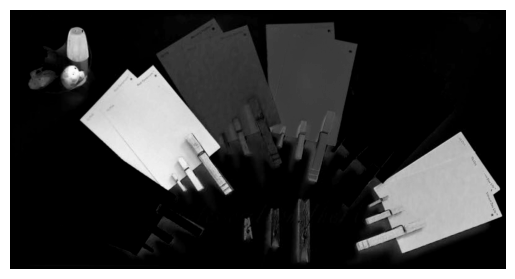

In [29]:
red_img=cv2.subtract(img1[:,:,-1],cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY))
imshow(red_img,'','gray')

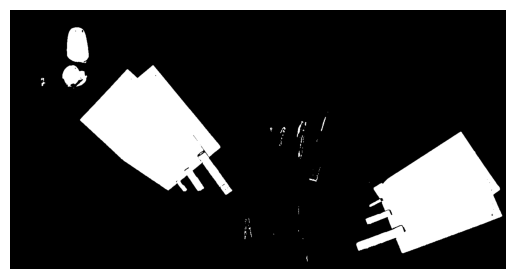

In [30]:
_,red_bw=cv2.threshold(red_img,60,255,cv2.THRESH_BINARY)
imshow(red_bw,'','gray')

In [31]:
strel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
strel

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=uint8)

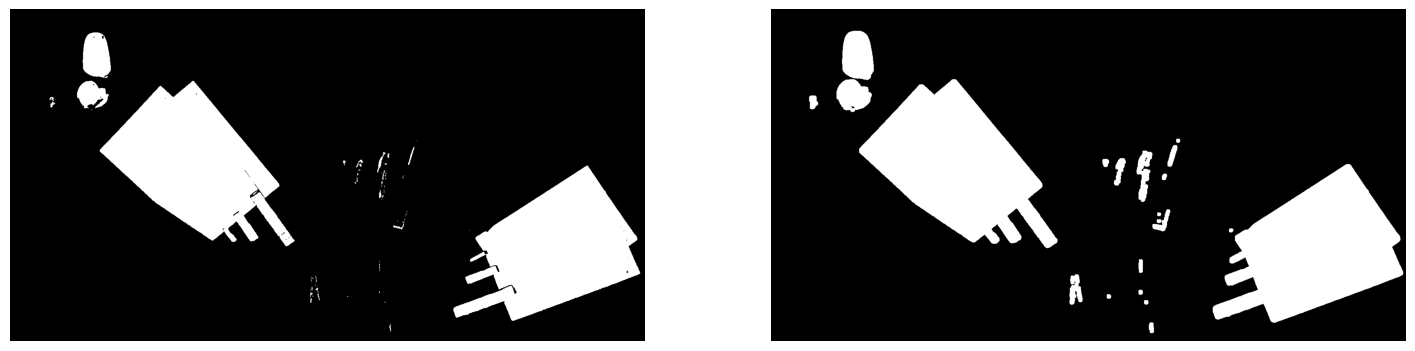

In [32]:
plt.figure(figsize=(18,6))
plt.subplot(121);imshow(red_bw,'','gray')
plt.subplot(122)

red_dilate=cv2.dilate(red_bw,strel)
imshow(red_dilate,'','gray')

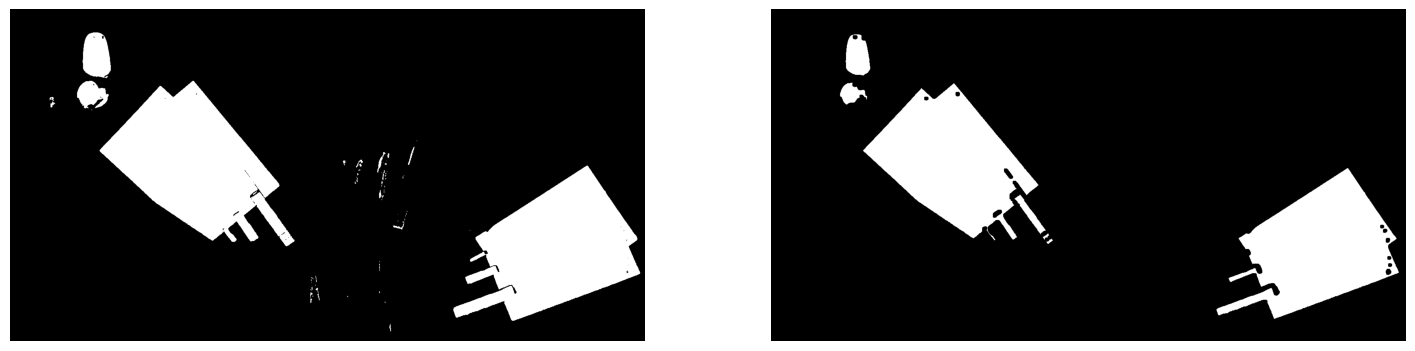

In [33]:
plt.figure(figsize=(18,6))
plt.subplot(121);imshow(red_bw,'','gray')
plt.subplot(122)

red_erode=cv2.erode(red_bw,strel)
imshow(red_erode,'','gray')

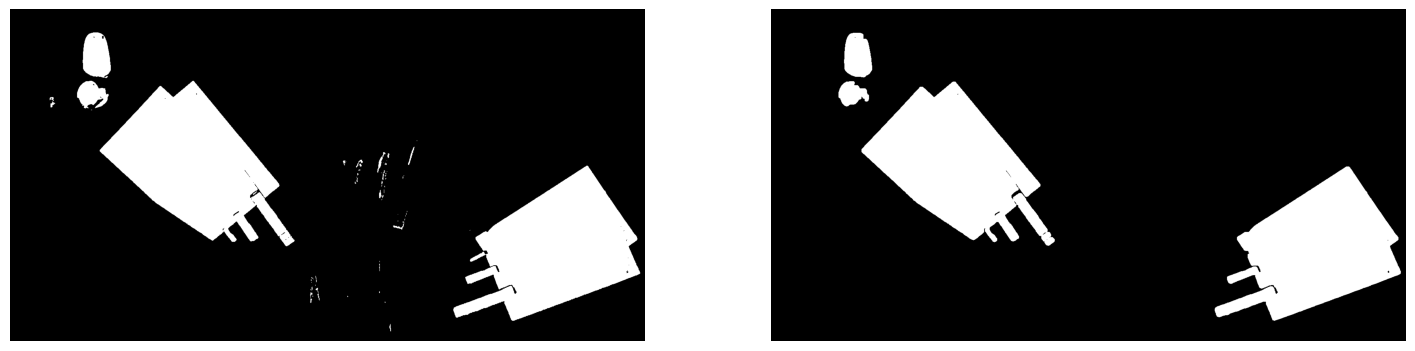

In [34]:
plt.figure(figsize=(18,6))
plt.subplot(121);imshow(red_bw,'','gray')
plt.subplot(122)

red_open=cv2.morphologyEx(red_bw,cv2.MORPH_OPEN,strel,iterations=1)
imshow(red_open,'','gray')

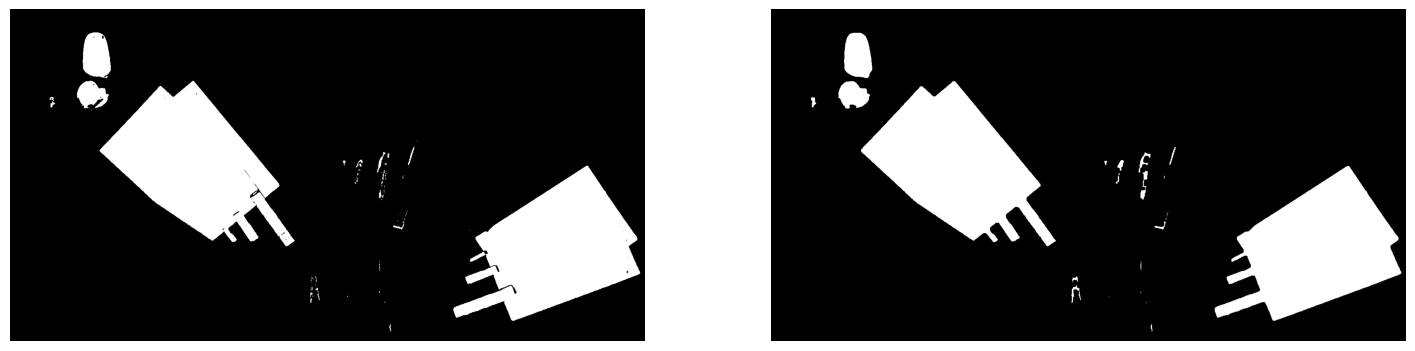

In [35]:
plt.figure(figsize=(18,6))
plt.subplot(121);imshow(red_bw,'','gray')
plt.subplot(122)

red_close=cv2.morphologyEx(red_bw,cv2.MORPH_CLOSE,strel,iterations=1)
imshow(red_close,'','gray')

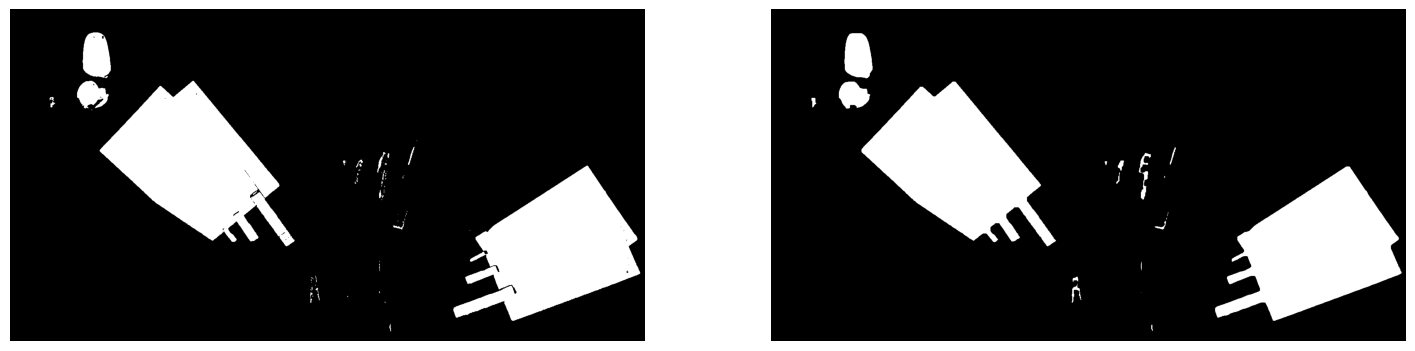

In [36]:
plt.figure(figsize=(18,6))
plt.subplot(121);imshow(red_bw,'','gray')
plt.subplot(122)

red_close2=cv2.morphologyEx(red_close,cv2.MORPH_CLOSE,strel,iterations=1)
imshow(red_close2,'','gray')

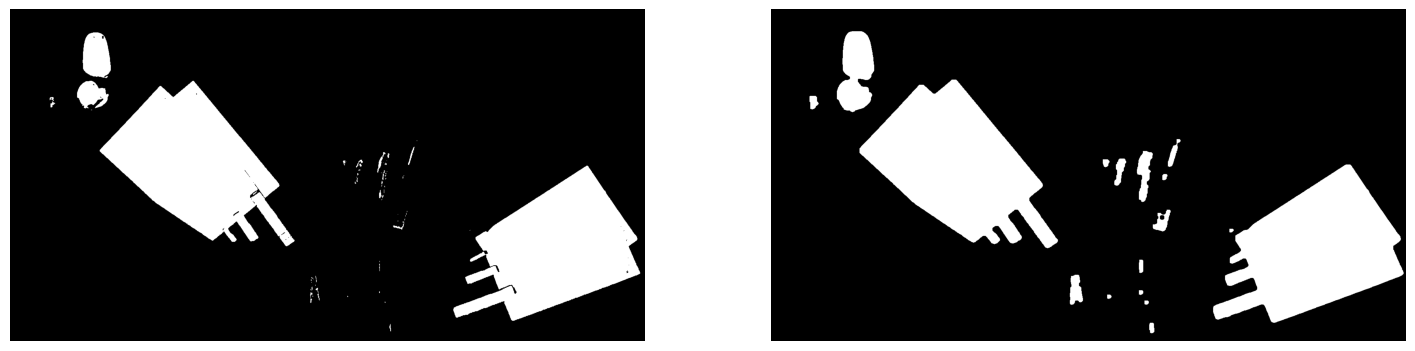

In [37]:
plt.figure(figsize=(18,6))
plt.subplot(121);imshow(red_bw,'','gray')
plt.subplot(122)

red_close2=cv2.morphologyEx(red_dilate,cv2.MORPH_CLOSE,strel,iterations=1)
imshow(red_close2,'','gray')

In [40]:
help(ski.morphology.remove_small_objects)

Help on function remove_small_objects in module skimage.morphology.misc:

remove_small_objects(ar, min_size=64, connectivity=1, in_place=False, *, out=None)
    Remove objects smaller than the specified size.
    
    Expects ar to be an array with labeled objects, and removes objects
    smaller than min_size. If `ar` is bool, the image is first labeled.
    This leads to potentially different behavior for bool and 0-and-1
    arrays.
    
    Parameters
    ----------
    ar : ndarray (arbitrary shape, int or bool type)
        The array containing the objects of interest. If the array type is
        int, the ints must be non-negative.
    min_size : int, optional (default: 64)
        The smallest allowable object size.
    connectivity : int, {1, 2, ..., ar.ndim}, optional (default: 1)
        The connectivity defining the neighborhood of a pixel. Used during
        labelling if `ar` is bool.
    in_place : bool, optional (default: False)
        If ``True``, remove the objects i

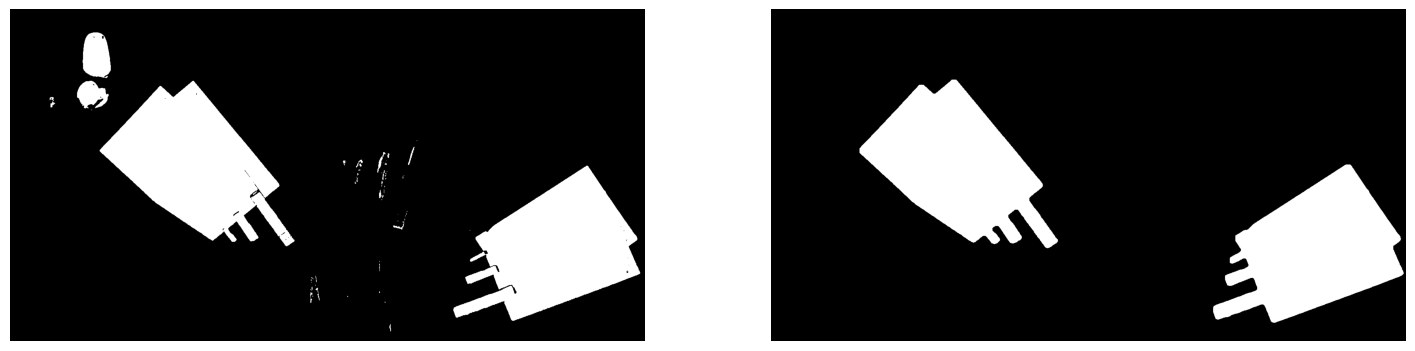

In [47]:
plt.figure(figsize=(18,6))
plt.subplot(121);imshow(red_bw,'','gray')
plt.subplot(122)

red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),15000)
imshow(red_close3,'','gray')

In [ ]:

# we can do remove small holes also if we want to remove the holes
#plt.figure(figsize=(18,6))
#plt.subplot(121);imshow(red_bw,'','gray')
#plt.subplot(122)

#red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),15000)
#imshow(red_close3,'','gray')

In [49]:
red_close3.dtype

dtype('bool')

In [52]:
rp=ski.measure.regionprops(ski.measure.label(red_close3.astype('uint8')))
rp

In [1]:
img_copy=img1.copy()
for r in rp:
    y1,x1,y2,x2=r.bbox
    cv2.rectangle(img_copy,(x1,y1),(x2,y2),color=[0,0,255],thickness=5)
imshow(img_copy[:,:,::-1],'red objects')


NameError: name 'img1' is not defined

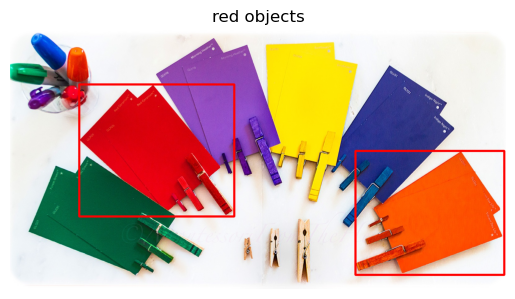

In [55]:
#summary
img=cv2.imread('J:\\deeplearning intership\\rgb.jpg')
red_img=cv2.subtract(img[:,:,-1],cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
_,red_bw=cv2.threshold(red_img,60,255,cv2.THRESH_BINARY)
strel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
red_dilate=cv2.dilate(red_bw,strel)
red_close2=cv2.morphologyEx(red_dilate,cv2.MORPH_CLOSE,strel,iterations=1)
red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),15000)
rp=ski.measure.regionprops(ski.measure.label(red_close3.astype('uint8')))
img_copy=img.copy()
for r in rp:
    y1,x1,y2,x2=r.bbox
    cv2.rectangle(img_copy,(x1,y1),(x2,y2),color=[0,0,255],thickness=5)
    imshow(img_copy[:,:,::-1],'red objects')

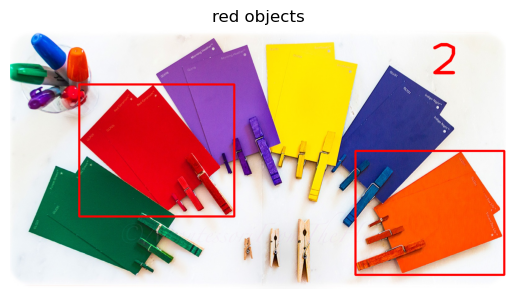

In [62]:
#summary
img=cv2.imread('J:\\deeplearning intership\\rgb.jpg')
red_img=cv2.subtract(img[:,:,-1],cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
_,red_bw=cv2.threshold(red_img,60,255,cv2.THRESH_BINARY)
strel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
red_dilate=cv2.dilate(red_bw,strel)
red_close2=cv2.morphologyEx(red_dilate,cv2.MORPH_CLOSE,strel,iterations=1)
red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),15000)
rp=ski.measure.regionprops(ski.measure.label(red_close3.astype('uint8')))
img_copy=img.copy()
for r in rp:
    y1,x1,y2,x2=r.bbox
    cv2.rectangle(img_copy,(x1,y1),(x2,y2),color=[0,0,255],thickness=5)
    count=str(len(rp))
    cv2.putText(img_copy,count,(img_copy.shape[1]-250,150),cv2.FONT_HERSHEY_PLAIN,10,(0,0,255),thickness=10)
    imshow(img_copy[:,:,::-1],'red objects')

In [81]:
vid=cv2.VideoCapture(0)
while True:

    ack,im=vid.read()
    if ack:
        red_img=cv2.subtract(
            img[:,:,-1],cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        )
    _,red_bw=cv2.threshold(red_img,60,255,cv2.THRESH_BINARY)
    strel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
    red_dilate=cv2.dilate(red_bw,strel)
    red_close2=cv2.morphologyEx(
        red_dilate,cv2.MORPH_CLOSE,strel,iterations=1
        )
    red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),1500)
    rp=ski.measure.regionprops(ski.measure.label(red_close3.astype('uint8')))
    img_copy=img.copy()
    for r in rp:
        y1,x1,y2,x2=r.bbox
        cv2.rectangle(img_copy,(x1,y1),(x2,y2),color=[0,0,255],thickness=5)
    count=str(len(rp))
    cv2.putText(img_copy,count,(img_copy.shape[1]-250,150),cv2.FONT_HERSHEY_PLAIN,10,(0,0,255),thickness=10)
    cv2.imshow('preview',im)
    key=cv2.waitKey(1)
    if key==ord('x'):
        break
       
cv2.destroyAllWindows()
vid.release()

In [74]:
ack

True